In [5]:
import seaborn as sb
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
iris_data = pd.read_csv('iris.data')
iris_data.columns = ['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class']
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


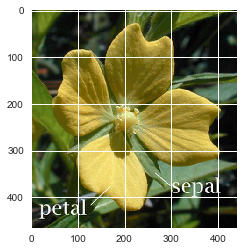

In [8]:
img = Image.open('test.jpg')
plt.imshow(img)
plt.show()

In [9]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


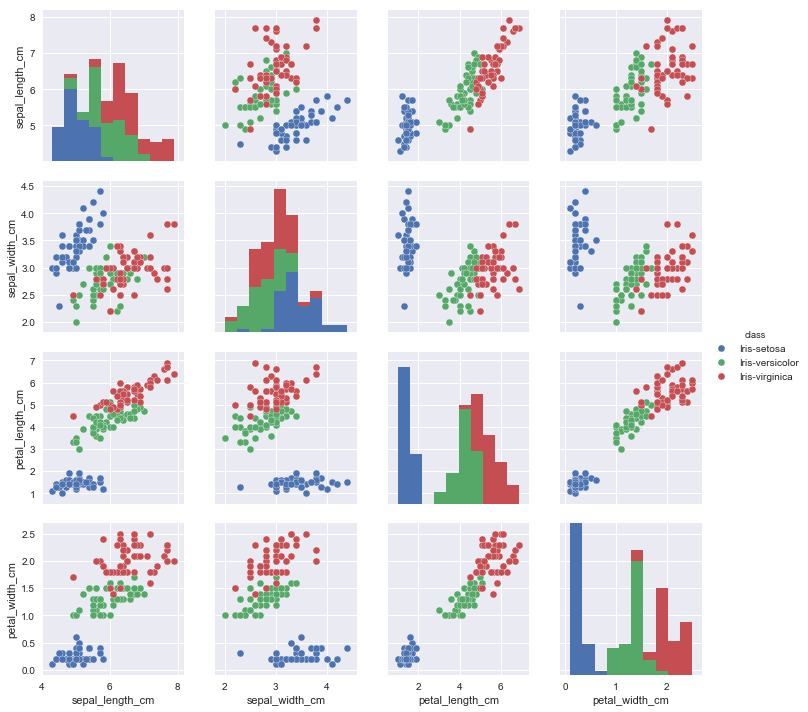

In [11]:
sb.pairplot(iris_data.dropna(),hue='class')

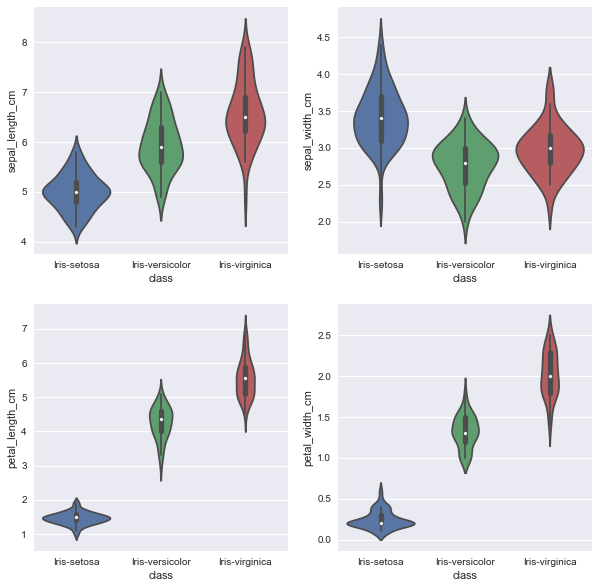

In [13]:
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2,2,column_index + 1)
    sb.violinplot(x='class',y=column,data=iris_data)

In [14]:
from sklearn.cross_validation import train_test_split

In [34]:
all_inputs = iris_data[iris_data.columns[iris_data.columns!='class']].values
#['sepal_length_cm', 'sepal_width_cm',
#                             'petal_length_cm', 'petal_width_cm']
all_classes = iris_data['class'].values
#iris_data.columns[iris_data.columns!='class']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs,all_classes,
                                     train_size = 0.75,random_state=1)



In [37]:
from sklearn.tree import DecisionTreeClassifier
# 1.criterion gini or entropy

# 2.splitter best or random 前者是在所有特征中找最好的切分点，后者是在部分特征中（数据量大的时候）

# 3.max_features None(所有),log2,sqrt,N 特征小于50的时候一般用所有特征

# 4.max_depth 数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

# 5.min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分
#                       如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

# 6.min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被
#                      剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

# 7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起
#                          被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，
#                          或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

# 8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。
#                   如果加了限制，算法会建立在最大叶子节点数内最优的决策树。
#                   如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制
#                   具体的值可以通过交叉验证得到。

# 9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多
#                 导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重
#                 如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

# 10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度
#                       (基尼系数，信息增益，均方差，绝对差)小于这个阈值
#                       则该节点不再生成子节点。即为叶子节点 。


In [38]:
decision_tree_classifier = DecisionTreeClassifier()

#train the classifier on the training set
decision_tree_classifier.fit(training_inputs,training_classes)

#validate the classifier on the testing set using classifier accuracy
decision_tree_classifier.score(testing_inputs,testing_classes)

0.97368421052631582

[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]


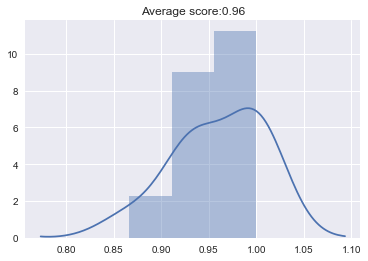

In [39]:
from sklearn.cross_validation import cross_val_score
import numpy as np

decision_tree_classifier = DecisionTreeClassifier()

#cross_val_score returns a list of the scores, which we can visualize
#to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv = 10 )
print cv_scores

sb.distplot(cv_scores)
plt.title('Average score:{}'.format(np.mean(cv_scores)))


[ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  0.66666667  0.66666667  0.66666667  0.64285714]


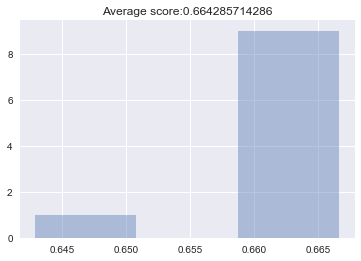

In [42]:
decision_tree_classifier = DecisionTreeClassifier(max_depth =1 )

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv= 10)
print cv_scores
sb.distplot(cv_scores,kde=False)
plt.title('Average score:{}'.format(np.mean(cv_scores)))

In [53]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()
parameter_grid = {'max_depth':[1,2,3,4,5],
                  'max_features':[1,2,3,4]}

cross_validation = StratifiedKFold(all_classes,n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv = cross_validation)
grid_search.fit(all_inputs,all_classes)

print 'best score:{}'.format(grid_search.best_score_)
print 'best parameter:{}'.format(grid_search.best_params_)


best score:0.959731543624
best parameter:{'max_features': 4, 'max_depth': 3}


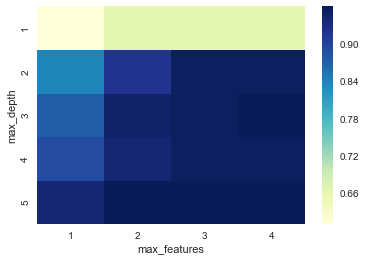

In [62]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5,4)
sb.heatmap(grid_visualization,cmap='YlGnBu')
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [61]:
decision_tree_classifier= grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot','w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier,out_file=out_file)


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators':[5,10,25,50],
                 'criterion':['gini','entropy'],
                 'max_features':[1,2,3,4],
                 'warm_start':[True,False]}

cross_validation = StratifiedKFold(all_classes,n_folds=10)
grid_search = GridSearchCV(random_forest_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs,all_classes)

print 'best score:{}'.format(grid_search.best_score_)
print 'best parameter:{}'.format(grid_search.best_params_)

grid_search.best_estimator_


best score:0.973154362416
best parameter:{'max_features': 2, 'n_estimators': 10, 'criterion': 'entropy', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)